In [8]:
import numpy as np
import matplotlib.pylab as plt
import utils as u
from datetime import datetime
from scipy.fftpack import dct

In [9]:
# plot setting
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [10]:
dimensions = [200, 500, 1000, 2000]
# dimensions = [20, 50, 100, 200]

timing = {
    "HomeMade": [],  # timing with our method
    "FFT": []  # timing with scipy method
}
results = {
    "HomeMade": [],  # results with our method
    "FFT": []  # results with scipy method
}

In [11]:
for n in dimensions:
    matrix = np.random.randint(0, 256, size=(n, n))
    t1 = datetime.now()
    results["FFT"].append(dct(matrix))
    t2 = datetime.now()
    # results["HomeMade"].append(dct(matrix))
    t3 = datetime.now()
    # timing["HomeMade"].append(t3 - t2)
    timing["FFT"].append(t2 - t1)

In [12]:
for i in range(len(dimensions)):
    # timing["HomeMade"][i] = int(timing["HomeMade"][i].total_seconds() * 1e6)
    timing["FFT"][i] = int(timing["FFT"][i].total_seconds() * 1e6)

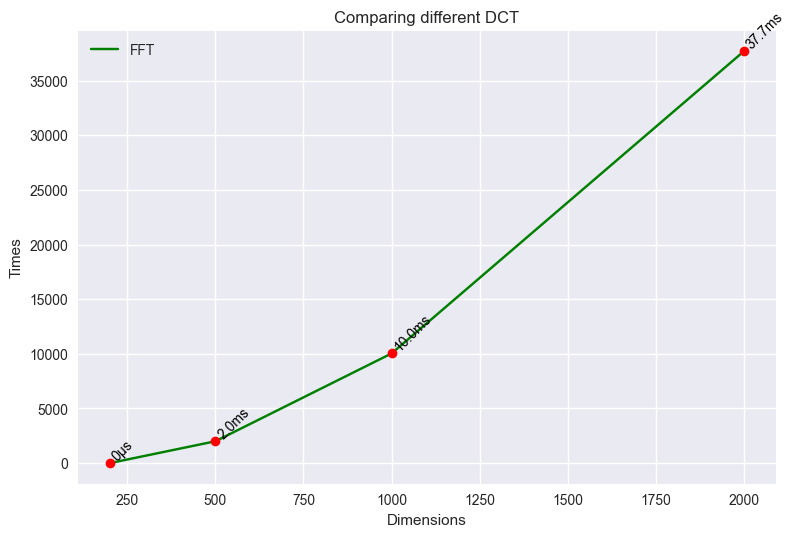

In [13]:
type = "FFT"
# for type in timing:
if type == "FFT":
    col = "green"
elif type == "HomeMade":
    col = "blue"
plt.plot(dimensions, timing[type], color=col, label=type)
for i in range(len(dimensions)):
    plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
    plt.text(dimensions[i], timing[type][i], u.printTime(
        timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Dimensions')
plt.ylabel('Times')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

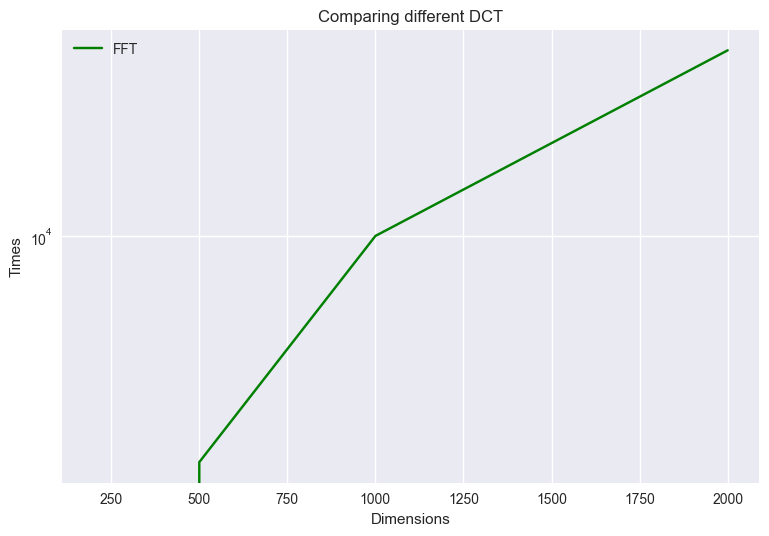

In [15]:
type = "FFT"
# for type in timing:
if type == "FFT":
    col = "green"
elif type == "HomeMade":
    col = "blue"
plt.semilogx(dimensions, timing[type], color=col, label=type)

plt.xlabel('Dimensions')
plt.ylabel('Times')
plt.title('Comparing different DCT')
plt.legend()
plt.show()